## Naive Bayes Classifier Algorithm
# (1) tatinac to see the probality of life survive  # so using nives
# (2) email dedection


In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [2]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [3]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

### we have to convert sex column to number

In [4]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [4]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [5]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


#### I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [6]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [7]:
inputs.columns[inputs.isna().any()]   #by using that you can see the null at paricular column

Index(['Age'], dtype='object')

In [8]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [21]:
from sklearn.naive_bayes import BernoulliNB    #guassin distrubation
model=BernoulliNB()

In [22]:
model.fit(X_train,y_train)

BernoulliNB()

In [23]:
model.score(X_test,y_test)

0.7835820895522388

In [24]:
X_test[0:10]

,Pclass,Age,Fare,female
515,1,47.000000,34.0208,0
63,3,4.000000,27.9000,0
265,2,36.000000,10.5000,0
744,3,31.000000,7.9250,0
795,2,39.000000,13.0000,0
398,2,23.000000,10.5000,0
351,1,29.699118,35.0000,0
836,3,21.000000,8.6625,0
556,1,48.000000,39.6000,1
209,1,40.000000,31.0000,0


In [25]:
y_test[0:10]

515    0
63     0
265    0
744    1
795    0
398    0
351    0
836    0
556    1
209    1
Name: Survived, dtype: int64

In [26]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [31]:
model.predict_proba(X_test[:10])

array([[0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.81021816, 0.18978184],
       [0.26081051, 0.73918949],
       [0.81021816, 0.18978184]])

#  spam email dataset dedaction

In [11]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

## we have to convert that text into numberic


In [13]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

## we have still message into test so we have to change this into number

## we will convert using count vactor techinque


# it fiind unique words and make mertic
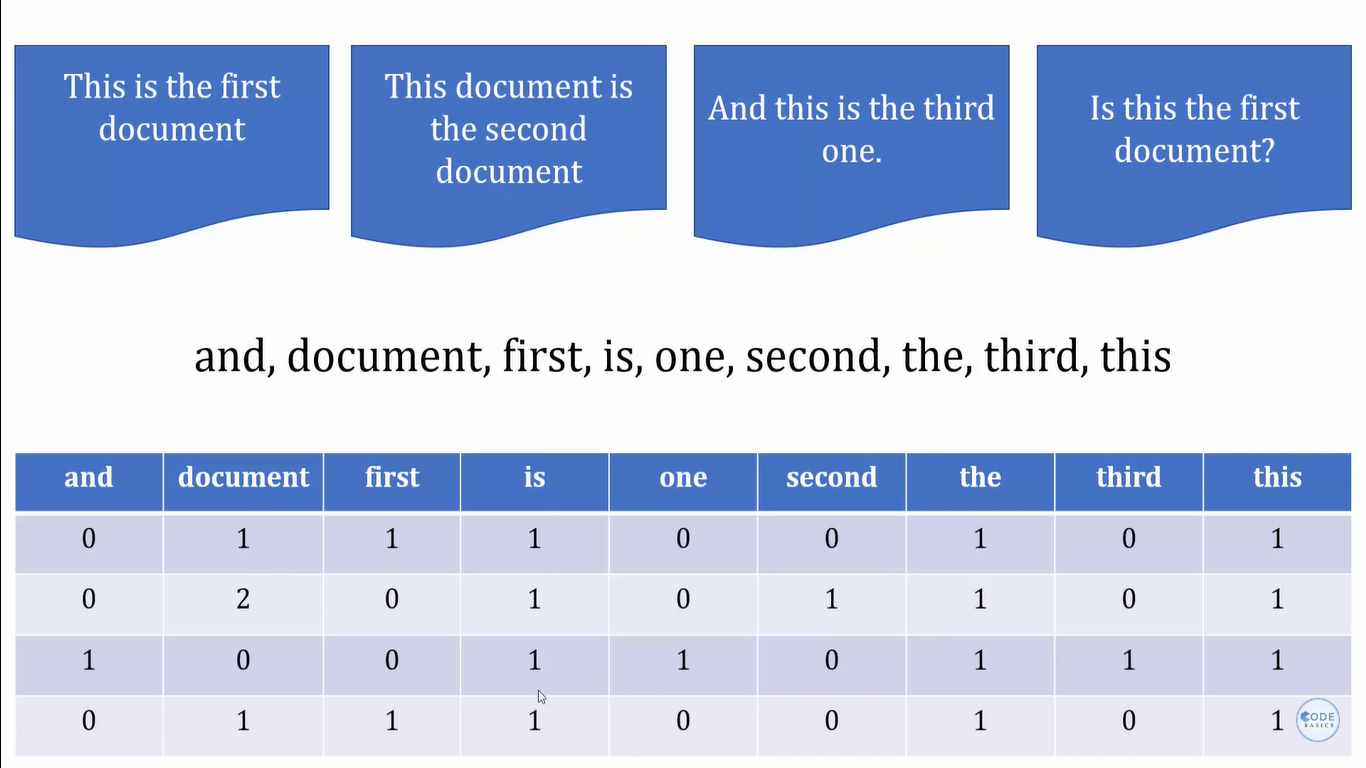

## for the whole code there is one pipeline labirary is there  at down

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

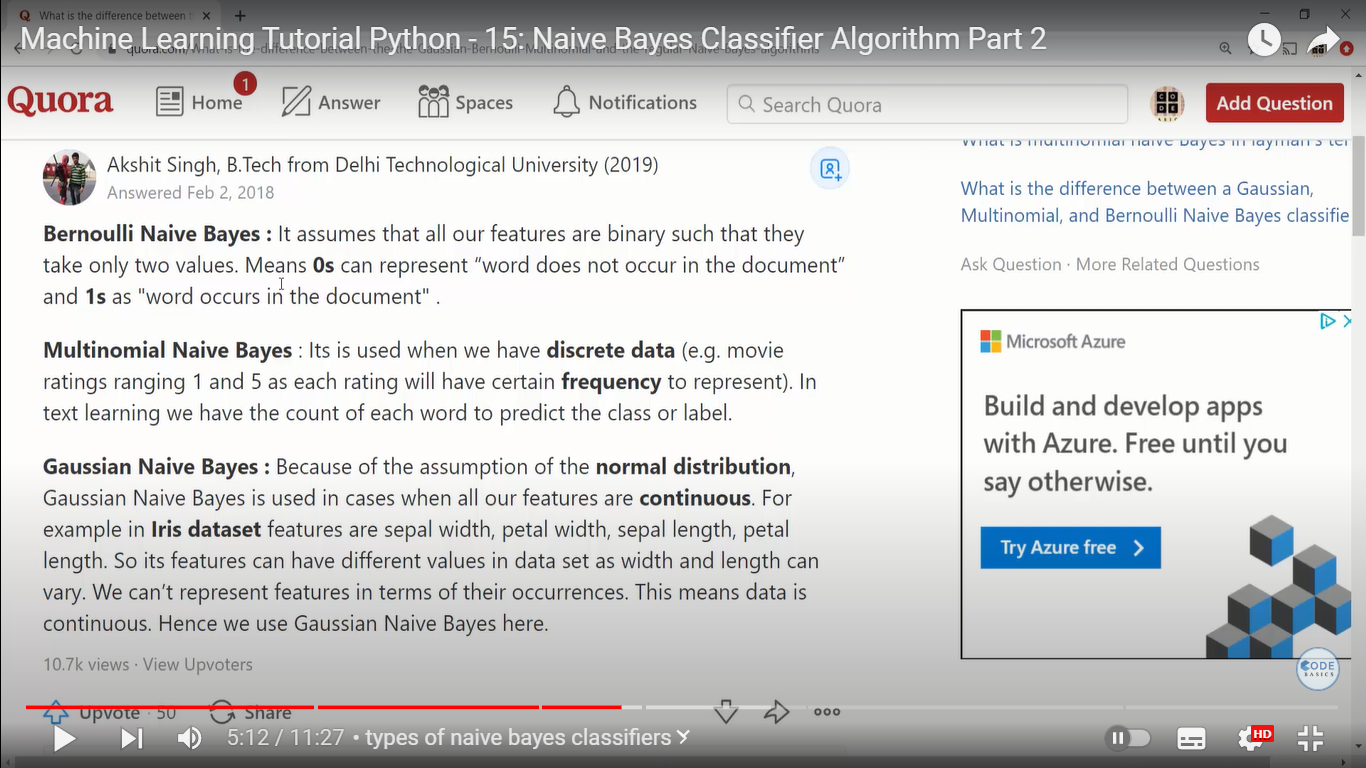

In [49]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [52]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

### to check score

In [53]:
x_count=v.transform(X_test)
model.score(x_count,y_test)

0.9813352476669059

# Alternate of the  above code

### Sklearn Pipeline

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [21]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [22]:
clf.score(X_test,y_test)

0.9856424982053122

In [23]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1], dtype=int64)